# Introduction

House Rocket is a fictional company that sells and buys houses using tecnology. In order to help the company to increase the revenue I may use the dataset (avaliable <a href="https://www.kaggle.com/harlfoxem/housesalesprediction">here</a>) to extract insights that can help the company answer the following questions:

1- Which houses should the House Rocket CEO buy and at what purchase price?

2- Once the house is in the company's possession, when is the best time to sell it and what would the sale price be?

3- Should House Rocket do renovations to increase the sale price? What would be the suggestions for changes? What is the increment in the price given by each renovation option? 

This challenge was proposed by the blog <a href="https://medium.com/@meigarom/os-5-projetos-de-data-science-que-far%C3%A1-o-recrutador-olhar-para-voc%C3%AA-c32c67c17cc9"><b>Seja Um Data Scientist</b></a>. 

# Code

### Imports

In [101]:
import pandas  as pd
import numpy   as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
#from datetime import datetime
import folium
from folium import plugins

### Loading data

In [102]:
project_dir = os.path.dirname( os.path.dirname( os.path.abspath( "-" ) ) )
data_dir = os.path.join( os.path.join( project_dir, "original data" ), "kc_house_data.csv" )
df_house_rocket = pd.read_csv( data_dir,  index_col="id" )
df_house_rocket.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [103]:
df_house_rocket.shape

(21613, 20)

## Data Preparation

In [104]:
df_house_rocket.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float

In [105]:
df_house_rocket.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no <b><i>na</i></b> or <b><i>null</i></b> values in this data set, however the column "date" needs a treatment.

In [106]:
df_house_rocket['date'] = df_house_rocket['date'].str.slice(start = 0, stop = 8)

In [107]:
df_house_rocket["date"] = df_house_rocket['date'].astype('datetime64')
df_house_rocket.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [108]:
df_house_rocket["month"] = pd.DatetimeIndex(df_house_rocket["date"]).month
df_house_rocket["year"] = pd.DatetimeIndex(df_house_rocket["date"]).year
df_house_rocket.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
id,,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


### Hypotheses
To generate insights, lets define some hypotheses that may be accepted or rejected in the next step.

1 - Houses that have a view to a waterfront are more expensive.<br>
2 - Houses with many bedrooms are more expensive.<br>
3 - The price of the houses increases when the size of the living room increases.<br>
4 - The most expensive houses are in Seattle.<br>

### Exploratoring data

In [8]:
df_house_rocket.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### 1. How much does having a waterfront view affect the price?

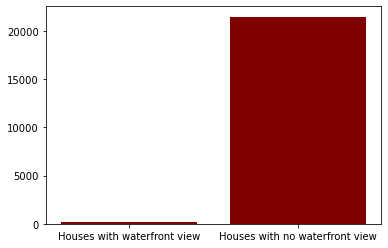

In [172]:
with_waterfront = len(df_house_rocket[df_house_rocket["waterfront"]==1])
with_no_waterfront = len(df_house_rocket[df_house_rocket["waterfront"]==0])
bars = [with_waterfront,with_no_waterfront]

plt.bar(["Houses with waterfront view", "Houses with no waterfront view"],
        bars, 
        color = 'maroon');


In [10]:
perc_with_waterfront=100*with_waterfront/(with_waterfront+with_no_waterfront)
perc_with_no_waterfront=100*with_no_waterfront/(with_waterfront+with_no_waterfront)
print("Percentage of houses with waterfront: {}\nPercentage of houses with no waterfront: {}".format(perc_with_waterfront,perc_with_no_waterfront))

Percentage of houses with waterfront: 0.7541757275713691
Percentage of houses with no waterfront: 99.24582427242864


In [11]:
# Mean price of houses with waterfront
df_house_rocket[df_house_rocket["waterfront"] == 1]["price"].mean()

1661876.0245398772

In [12]:
# Mean price of houses with no waterfront
df_house_rocket[df_house_rocket["waterfront"] == 0]["price"].mean()

531563.5998135199

#### - Insight 
Only a few houses in the dataset have waterfront view (0.75%), and their mean prices are about three times more expensive than a regular house. This validate the hypoteses 1, however we should keep in mind that there are other features with stronger correlation, and we have only a few houses with waterfront in the dataset. 

-------------------------------------------------------------------------------

### 2 - Are houses with many bedrooms more expensive?

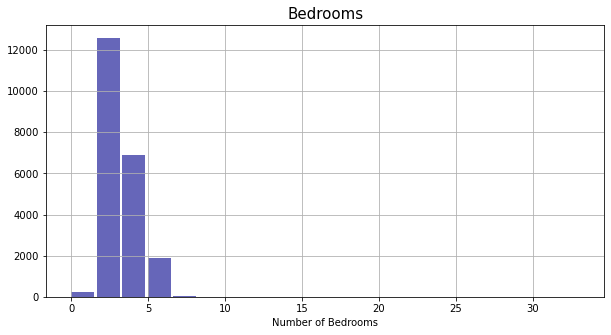

In [60]:
#Number of bedrooms

df_house_rocket.bedrooms.hist(bins = 20, alpha=0.6, width=1.5, figsize=(10,5), color='darkblue')
plt.title('Bedrooms', size=15)
plt.xlabel('Number of Bedrooms')
plt.show()

In [56]:
cont_bedrooms = df_house_rocket.bedrooms.value_counts()
cont_bedrooms

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

There is a outlier: one house with 33 bedrooms, lets see the histogram without the outlier.

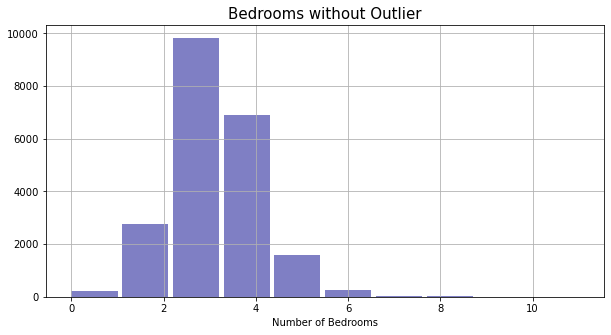

In [67]:
df_house_rocket.bedrooms[df_house_rocket.bedrooms<33].hist( alpha=0.5, width=1.0, figsize=(10,5), color='darkblue')
plt.title('Bedrooms without Outlier', size=15)
plt.xlabel('Number of Bedrooms')
plt.show()

In [55]:
j=0
total=dist_bedrooms.sum()
for i in dist_bedrooms[:-1]:
    print("Number of rooms: {}, percentage: {}%".\
          format(dist_bedrooms.index[:-1][j],round(100*i/total,3)))
    j+=1


Number of rooms: 3, percentage: 45.454%
Number of rooms: 4, percentage: 31.842%
Number of rooms: 2, percentage: 12.77%
Number of rooms: 5, percentage: 7.408%
Number of rooms: 6, percentage: 1.259%
Number of rooms: 1, percentage: 0.921%
Number of rooms: 7, percentage: 0.176%
Number of rooms: 0, percentage: 0.06%
Number of rooms: 8, percentage: 0.06%
Number of rooms: 9, percentage: 0.028%
Number of rooms: 10, percentage: 0.014%
Number of rooms: 11, percentage: 0.005%


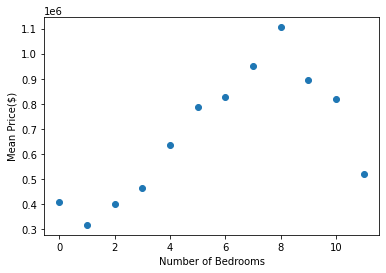

In [17]:
# Scatter plot removing 1 outlier 
price_means = [df_house_rocket[df_house_rocket["bedrooms"]==i]["price"].mean()
         for i in range(0,12)]

plt.scatter(x=range(0,12),y=price_means);
plt.xlabel("Number of Bedrooms");
plt.ylabel("Mean Price($)");

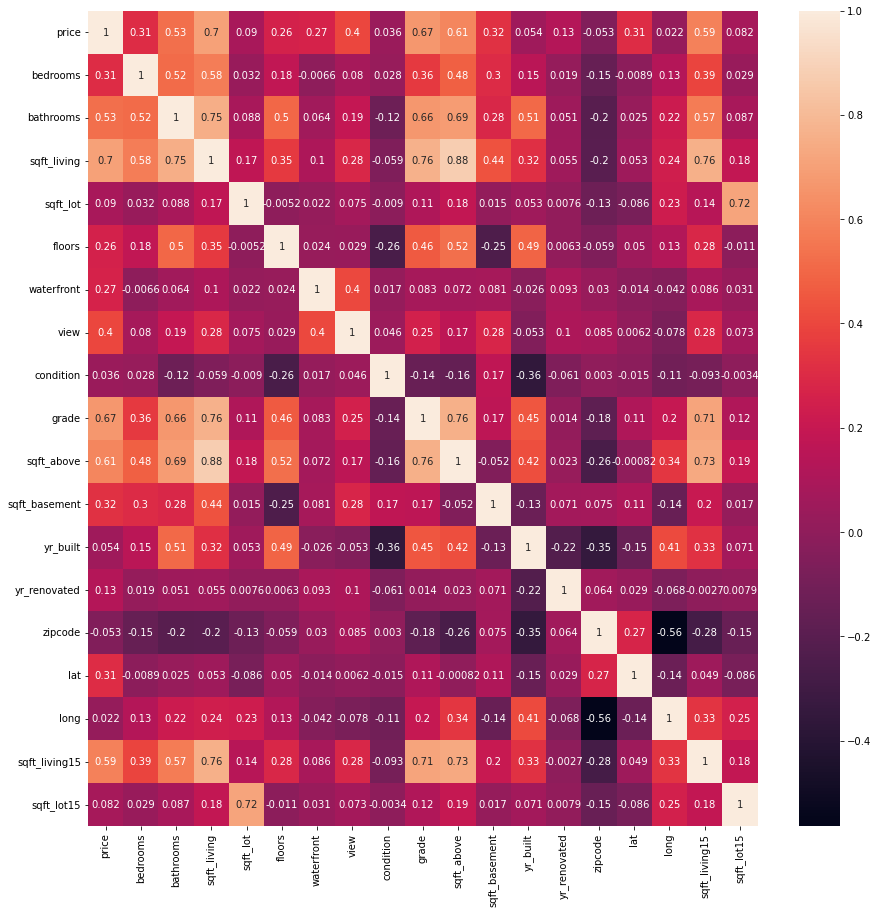

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap( df_house_rocket.corr(), annot = True );

#### - Insight 
About 97% of the houses have 2, 3, 4 or 5 bedrooms. The scatter plot shows the tendency of higher mean prices as the number of bedrooms increases, and the Pearson correlation coefficient of 0.31 also shows that the number of badrooms and the price are correlated. That indicates that the second hypotesis must be right.

-------------------------------------------------------------------------------

### 3 - What is the effect of the size of the living room on the price of the houses?

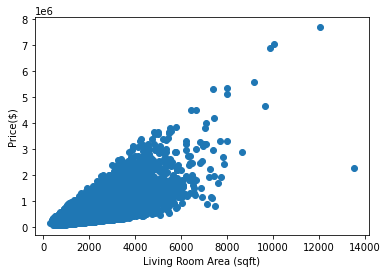

In [58]:
plt.scatter(x=df_house_rocket["sqft_living"],y=df_house_rocket["price"]);
plt.xlabel("Living Room Area (sqft)");
plt.ylabel("Price($)");

#### - Insight 
It is not so hard to see that the price of the houses increases when the size of the living room increases. Plus, <i>sqft_living</i> has the stronger correlation with the price. Thus the insight is that the <i>sqft_living</i> is the most important feature to tell what the price is.

--------------------------------------------------------------------------------------------------------------------------------------

### 4 - Where are the most expensive houses?

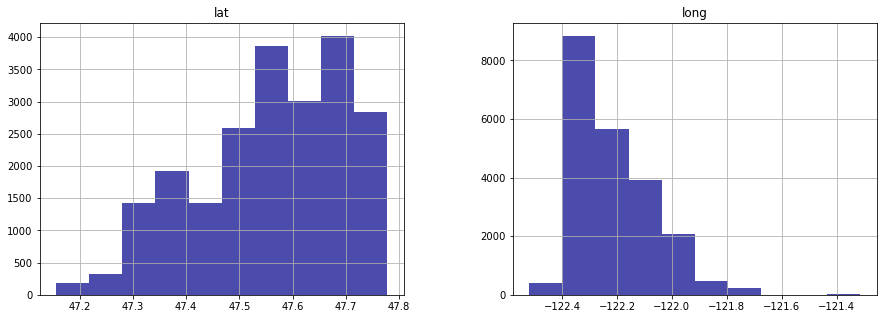

In [80]:
#histograms
df_house_rocket.loc[:,["lat", "long"]].hist(alpha=0.7, figsize=(15,5), color='darkblue')
plt.show()

In [82]:
# Criate a df with the 200 most expensive houses and their coordinates
coords = df_house_rocket.loc[:, ["lat","long","price"] ].sort_values("price", ascending = False).head(200)
coords

,lat,long,price
id,,,
6762700020,47.6298,-122.323,7700000.0
9808700762,47.6500,-122.214,7062500.0
9208900037,47.6305,-122.240,6885000.0
2470100110,47.6289,-122.233,5570000.0
8907500070,47.6232,-122.220,5350000.0
...,...,...,...
1338300170,47.6321,-122.304,2048000.0
46100504,47.5648,-122.210,2027000.0
3585901085,47.7612,-122.381,2005000.0


In [84]:
base_map=folium.Map(location=[47.614624,-122.261878],
                   width="80%",
                   height="100%",
                   zoom_start=12)

for i in range(len(coords)):
    folium.CircleMarker(location=[coords.iloc[i]["lat"], coords.iloc[i]["long"]],
                               radius=3,
                               color='black',
                       tooltip="Price($):"+str(coords.iloc[i]["price"])).add_to(base_map)

base_map=base_map.add_child(plugins.HeatMap(coords))

In [86]:
base_map

#### - Insight 

The heatmap with the 200 most expensive houses shows a concentration in the region of Medina and Washington Park neighborhood in Seattle. Medina is known for being the city where Bill Gates and Jeff Bezos live, based on that it is not too hard imagine why the houses there are more expensive.


-------------------------------------------------------------------------------

### 5 - Is there a period of the year where the prices are higher or lower?

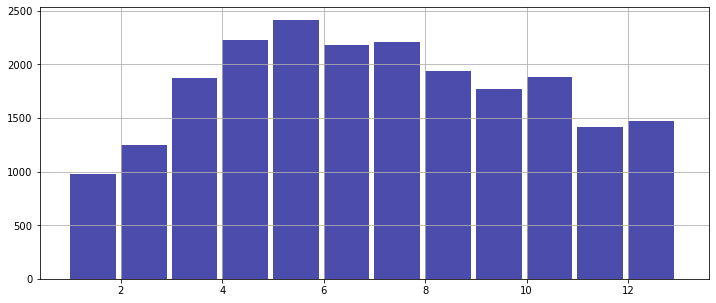

In [165]:
#histograms
df_house_rocket["month"].hist(alpha=0.7, figsize=(12,5), color='darkblue',bins= [1,2,3,4,5,6,7,8,9,10,11,12,13],width=0.9)
plt.show()

In [168]:
months = [i for i in range(1,13)]
price_means_by_month = [df_house_rocket[df_house_rocket["month"]==i]["price"].mean()
         for i in months]

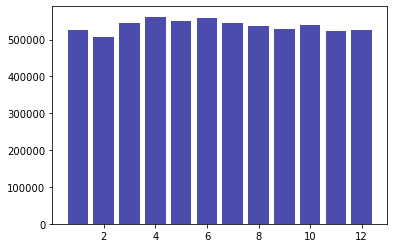

In [174]:
plt.bar(months,
        price_means_by_month, 
        color = 'darkblue',alpha=0.7);

#### - Insight 

Although in January and Fabruary fewer houses were sold, it doesn't seem to be a month or a period of the year where the prices change significantly.


-------------------------------------------------------------------------------

In [20]:
#outliers
#number of bedrooms
df_house_rocket[df_house_rocket["bedrooms"]==33]
#size of the living room
df_house_rocket[df_house_rocket["sqft_living"]>13000]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
1225069038,2014-05-05,2280000.0,7,8.0,13540,307752,3.0,0,4,3,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800
